In [3]:
import numpy as np
import math
from scipy.optimize import minimize_scalar

def build_matrix(a, b, n=10):
    """
    Build the n×n matrix whose entries satisfy:
       M[i,i+1] = M[i+1,i] = a
       M[i,i+2] = M[i+2,i] = b
    (with indexing from 0..n-1 in Python).
    """
    M = np.zeros((n,n), dtype=float)
    for i in range(n-1):
        M[i, i+1] = a
        M[i+1, i] = a
    for i in range(n-2):
        M[i, i+2] = b
        M[i+2, i] = b
    # 例として左上と右下をつなぐバンド(0とn-1)に bを入れている
    # 問題文にあったように "M[0, n-1] と M[n-1, 0]" を設定
    M[0, n-1] = b
    M[n-1, 0] = b
    return M

def formula_eigvals(a, b, z, n=10):
    """
    Return the list of eigenvalues from the closed-form formula:
       λ_k = 2 [ a cos(kπ/(n+1)) + b cos(2kπ/(n+1)) ]
    for k = 1..n.
    """
    eigs = []
    for k in range(1, n+1):
        theta = z*k*math.pi/(n+1)
        lam_k = 2*(a*math.cos(theta) + b*math.cos(2*theta))
        eigs.append(lam_k)
    return sorted(eigs)




In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math


def f1(t, n):
    """
    f(1) を t, n の関数として定義
    f(1) = -1/2 cos(alpha) 
           -1/2 cos(4t) cos(alpha) 
           +1/4 cos(4t) cos(2 alpha)
    """
    alpha = np.pi / (2**n - 1)
    return (
        -0.5*np.cos(alpha)
        - 0.5*np.cos(4*t)*np.cos(alpha)
        + 0.25*np.cos(4*t)*np.cos(2*alpha)
    )

def h(t, n):
    """
    h(t) = 1/4 + 1/8 cos(4t) + (1/2)*f(1)
    """
    return 0.25 + 0.125*np.cos(4*t) + 0.5*f1(t, n)

def build_matrix(t, n):
    dtheta = t
    a = -1/4 * math.cos(2*dtheta)**2
    b =  1/16 * math.cos(4*dtheta)
    """
    Build the n×n matrix whose entries satisfy:
       M[i,i+1] = M[i+1,i] = a
       M[i,i+2] = M[i+2,i] = b
    (with indexing from 0..n-1 in Python).
    """
    M = np.zeros((n,n), dtype=float)
    for i in range(n-1):
        M[i, i+1] = a
        M[i+1, i] = a
    for i in range(n-2):
        M[i, i+2] = b
        M[i+2, i] = b
    # 例として左上と右下をつなぐバンド(0とn-1)に bを入れている
    # 問題文にあったように "M[0, n-1] と M[n-1, 0]" を設定
    a0 = -1/4 * math.cos(2*dtheta) * math.cos(2*(n-1)*dtheta)
    M[0, n-1] = a0
    M[n-1, 0] = a0 
    b1 =  1/16 * math.cos(2*(n-2) *dtheta)

    M[0, n-2] = b1
    M[n-2, 0] = b1  
    M[1, n-1] = b1
    M[n-1, 1] = b1 

    return M

def min_f(t,n):
    target_mat = build_matrix(t, n )
    vals_numeric, _ = np.linalg.eigh(target_mat) 
    min_val = np.min(vals_numeric)
    Ctheta = 1/4 + 1/8 * math.cos(4*t)
    # print(t)
    return Ctheta + min_val

    

def g(t, n):
    """
    g(t) = cos^2(2t)* sin^2(pi/2^(n+1))
           - (1/8)*cos(4t)*(1 - 1/2^n)*(1 + cos(2π/2^n))
           + (1/8)*cos(2t*(2^n - 2))*(1/2^n)*(1 - cos(2π/2^n))
    """
    term1 = (np.cos(2*t)**2) * (np.sin(np.pi / (2**(n+1)))**2)
    term2 = (-1/8)*np.cos(4*t)*(1 - 1/(2**n))*(1 - np.cos(2*np.pi/(2**n)))
    term3 = (1/8)*np.cos(2*t*(2**n - 2))*(1/(2**n))*(1 - np.cos(2*np.pi/(2**n)))
    return term1 + term2 + term3 






In [8]:
n = 8
alpha = np.pi / (2**n - 1)  
beta  = 2*np.pi / (2**n)

t_vals = np.linspace(0.01, np.pi/2-0.01, 10000)

h_vals = [min_f(t, 2**n) for t in t_vals]
g_vals = [g(t, n) for t in t_vals]


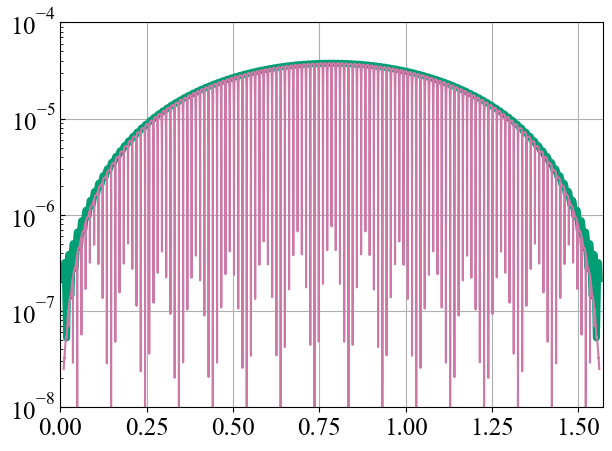

In [9]:
# グラフ作成
# plt.rcdefaults()
Z =5
plt.figure(figsize=(1.4*Z, Z))
plt.yscale('log')
plt.ylim([10**-8, 10**-3])
plt.rcParams['font.family'] = 'Times New Roman' 
plt.rcParams["font.size"] = 18
plt.tick_params(axis='y',  which='both', direction='in')
plt.rcParams["legend.fancybox"] = False # 丸角
plt.rcParams["legend.framealpha"] = 1 # 透明度の指定、0で塗りつぶしなし
plt.rcParams["legend.edgecolor"] = 'black' # edgeの色を変更

plt.plot(np.array(t_vals) + 0. * np.ones_like(t_vals), g_vals, linewidth=5 ,color= '#009E73' , label=r"sine state")
plt.plot(t_vals, h_vals, color='#CC79A7'  ,label=r"Numerical optimal state")

plt.xlim([0, np.pi/2])
plt.ylim([10 ** -8, 10** -4])


plt.grid(True)
plt.show()

In [10]:
n = 9
alpha = np.pi / (2**n - 1)  
beta  = 2*np.pi / (2**n)

t_vals = np.linspace(0.01, np.pi/2-0.01, 10000)

h_vals = [min_f(t, 2**n) for t in t_vals]
g_vals = [g(t, n) for t in t_vals]

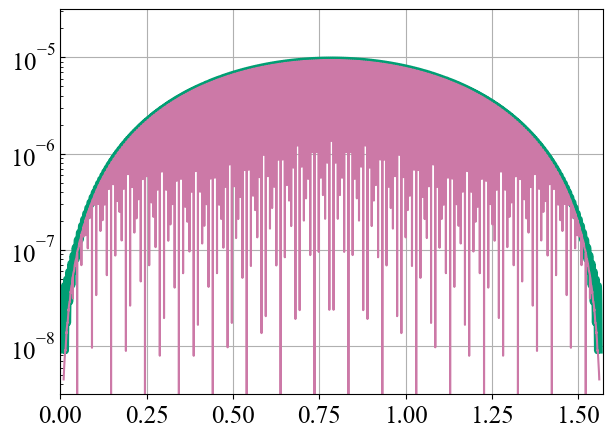

In [11]:
# グラフ作成
# plt.rcdefaults()
Z =5
plt.figure(figsize=(1.4*Z, Z))
plt.yscale('log')
plt.ylim([10**-8, 10**-3])
plt.rcParams['font.family'] = 'Times New Roman' 
plt.rcParams["font.size"] = 18
plt.tick_params(axis='y',  which='both', direction='in')
plt.rcParams["legend.fancybox"] = False # 丸角
plt.rcParams["legend.framealpha"] = 1 # 透明度の指定、0で塗りつぶしなし
plt.rcParams["legend.edgecolor"] = 'black' # edgeの色を変更

plt.plot(np.array(t_vals) + 0. * np.ones_like(t_vals), g_vals, linewidth=5 ,color= '#009E73' , label=r"sine state")
plt.plot(t_vals, h_vals, color='#CC79A7'  ,label=r"Numerical optimal state")

plt.xlim([0, np.pi/2])
plt.ylim([10 ** -8.5, 10** -4.5])


plt.grid(True)
plt.show()